# Import essential libraries like NumPy, Pandas, Matplotlib, and Scikit-Learn.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Obtain a housing dataset and load it using Pandas.

In [3]:
df= pd.read_csv(r"housing_dataset.csv")

In [5]:
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


# Data Preprocessing:





In [29]:
# Handle missing values by imputing or dropping. 

df.isnull().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

In [38]:
# Encode categorical features. 

df=pd.get_dummies(df).head(5)
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,1,114300,1790,2,2,2,True,False,True,False,False
1,2,114200,2030,4,2,3,True,False,True,False,False
2,3,114800,1740,3,2,1,True,False,True,False,False
3,4,94700,1980,3,2,3,True,False,True,False,False
4,5,119800,2130,3,3,3,True,False,True,False,False


In [41]:
# Scale/normalize numerical features if necessary.

x = df.drop("Price", axis=1)
y = df['Price']

scaler = StandardScaler()
x_scaler =scaler.fit_transform(x)

# EDA & Visualization:



In [97]:
# Explore the data using Descriptive statistics. 

df.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.000000,111560.000000,1934.000000,3.000000,2.200000,2.400000
std,1.581139,9709.943357,164.408029,0.707107,0.447214,0.894427
min,1.000000,94700.000000,1740.000000,2.000000,2.000000,1.000000
25%,2.000000,114200.000000,1790.000000,3.000000,2.000000,2.000000
50%,3.000000,114300.000000,1980.000000,3.000000,2.000000,3.000000
75%,4.000000,114800.000000,2030.000000,3.000000,2.000000,3.000000
max,5.000000,119800.000000,2130.000000,4.000000,3.000000,3.000000


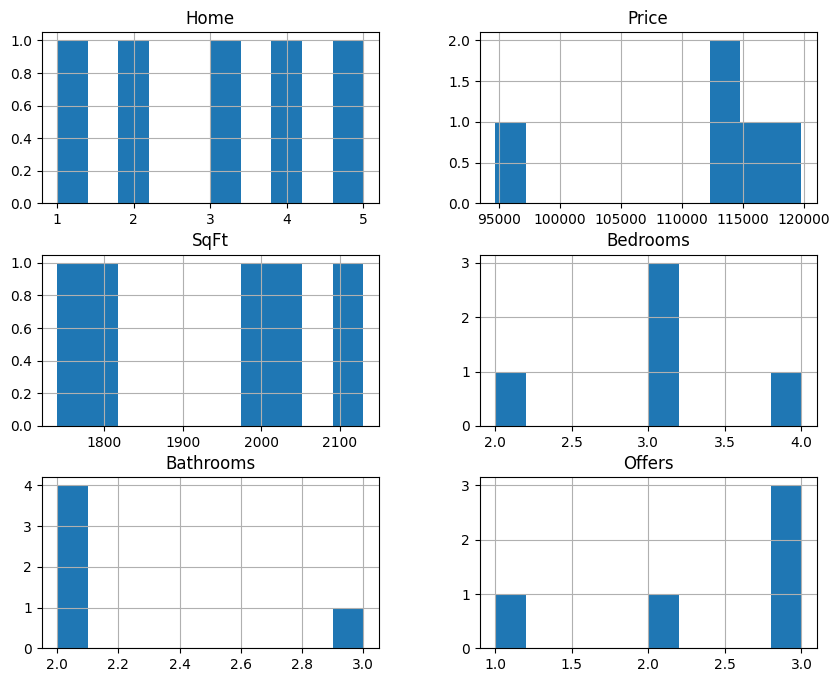

In [57]:
# Data visualizations (histograms).

df.hist(figsize=(10,8))
plt.show()

<Axes: xlabel='Price'>

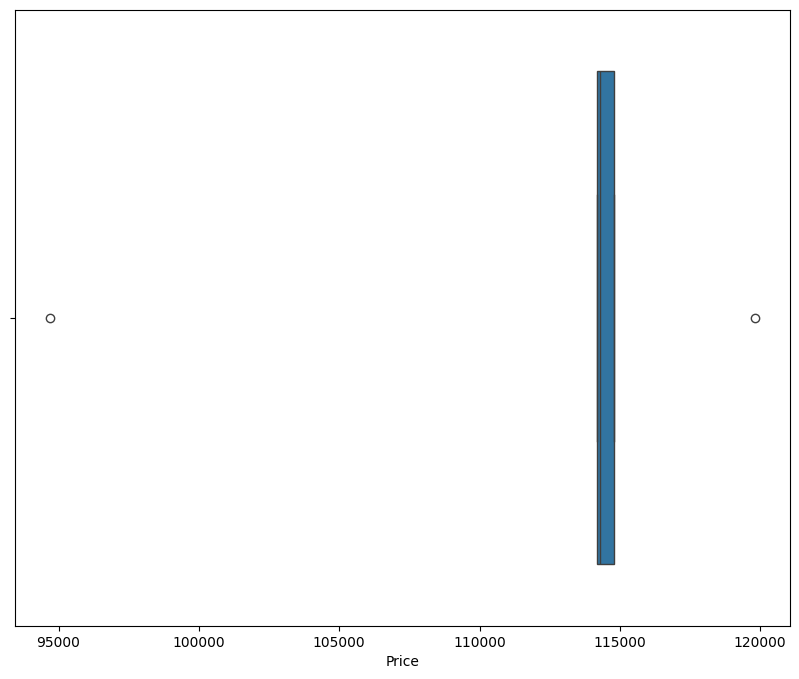

In [98]:
plt.figure(figsize=(10,8))
sns.boxplot(x= "Price", data=df)

# Outlier Detection & Handling:



In [85]:
# Identify and manage outliers using box plots, scatter plots, or statistical methods.
q1= df["Price"].quantile(0.25)
q3= df["Price"].quantile(0.75)

IQR = q3-q1

min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)

df1 = df[(df['Price'] >= min_range) & (df['Price'] <= max_range)]

<Axes: xlabel='Price'>

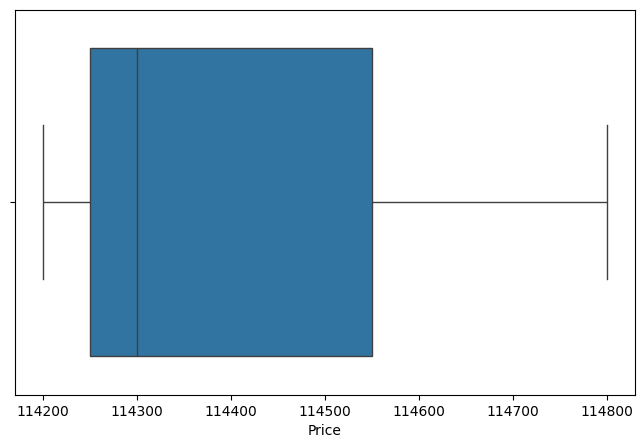

In [89]:
plt.figure(figsize=(8,5))
sns.boxplot(x= "Price", data=df1)

# Linear Regression Model:


In [91]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.2, random_state=42)


In [93]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [95]:
# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

# Display coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Mean Absolute Error: 21502.283510758483
Mean Squared Error: 462348196.17703617
R^2 Score: nan
Coefficients: [-2334.32362628  -881.89575222 -3164.58938459 11060.07900797
 -6804.02144299     0.             0.             0.
     0.             0.        ]
Intercept: 107259.54329784831


C:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
